In [1]:
import DirectDmTargets as dddm

calculating effective efficiency for Xe detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Ge detector done


In [2]:
import corner

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import os

In [7]:
results = {}
for i in range(200):
    try:
        results[i] = dddm.load_nestle_samples(
            dddm.default_nestle_save_dir(), i)
        print()
    except FileNotFoundError:
        pass
#         print(f"No result for {i}")
#     print()

load_nestle_samples::	loading results/nestle0/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/nestle51/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/nestle52/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/nestle53/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/nestle54/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr

In [8]:
results.keys()

dict_keys([0, 51, 52, 53, 54, 55, 56])

In [9]:
selected_keys = []
for i in results.keys():
#     print(results[i]['config']['notes'])
#     if results[i]['res_dict']['nestle_nposterior'] < 1000:
#         print(results[i]['config']['notes'])
    if 'nestle-extra_long' in results[i]['config']['notes']:
#         print(i, ",")
        selected_keys.append(i)
selected_keys

[]

---0---


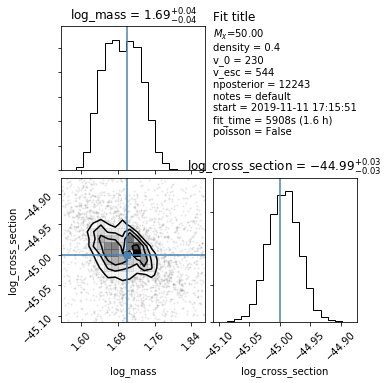

---51---


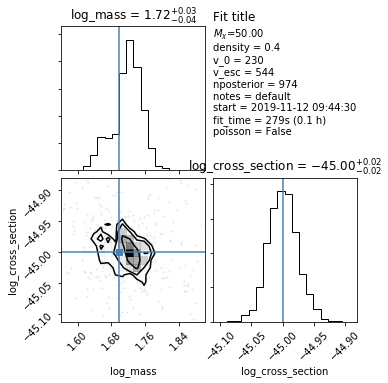

---52---


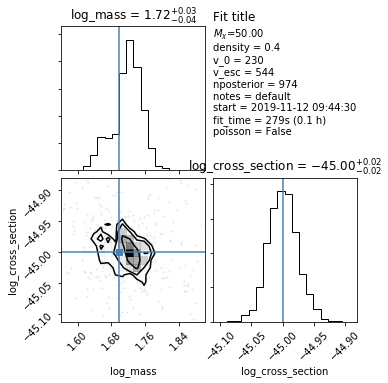

---53---


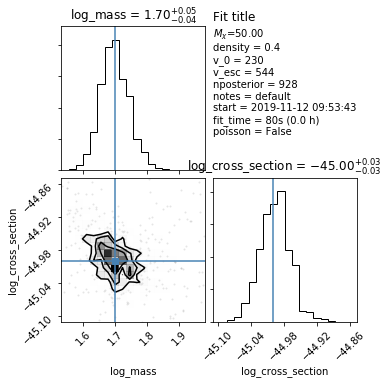

---54---


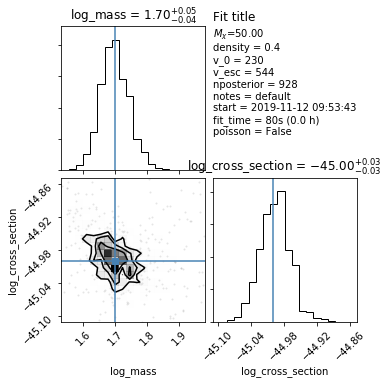

---55---


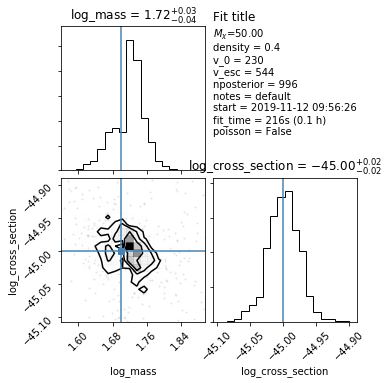

---56---


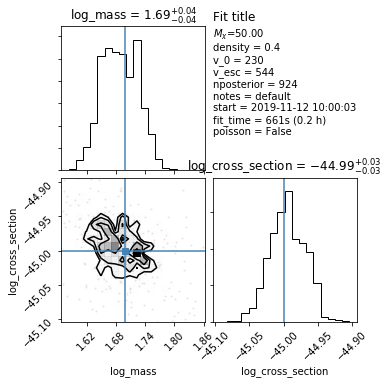

In [13]:
for key in results.keys():
# for key in selected_keys:
    print(f"---{key}---")
    result = results[key]
    dddm.nestle_corner(result)

In [16]:
import multihist as mh

In [17]:
def get_posterior(samples, weights):
    # re-scale weights to have a maximum of one
    nweights = weights/np.max(weights)

    # get the probability of keeping a sample from the weights
    keepidx = np.where(np.random.rand(len(nweights)) < nweights)[0]
    # get the posterior samples
    return samples[keepidx,:]


In [79]:
# np.shape(np.random.normal(1, 1, 10**6))


ModuleNotFoundError: No module named 'seaborn'

In [102]:
def show_combined_results(items):
    nbins = 45
    bin_range = [[1, 3], [-45.5, -44.3]]
    m2 = mh.Histdd(bins=nbins, range=bin_range, axis_names=['x', 'y'])
    for i in items:
        xbins, ybins = bin_range
        result = get_posterior(results[i]['samples'], results[i]['weights']).T[:2]
        counts, _, _ = np.histogram2d(*result, nbins, 
                                range = bin_range, normed = True) 
        cont = plt.contour(counts.T,
                extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                           linewidths=1, cmap = plt.cm.rainbow, 
                           levels = [5, 95])

        m2.add(*result)

    artists, labels = cont.legend_elements()
    plt.legend(artists, labels, handleheight=2, loc = "lower right")

    plt.axvline(np.log10(25), c = 'r')
    plt.axvline(np.log10(50), c = 'r')
    plt.axvline(np.log10(250), c = 'r')
    plt.axhline(-45, c = 'r')
#     m2.add(np.random.normal(-2, 1, 10**6), np.random.normal(2, 1, 10**6))
#     m2.plot(log_scale = True)

    plt.show()

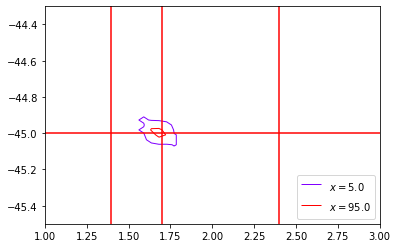

In [104]:
items = [56]
show_combined_results(items)

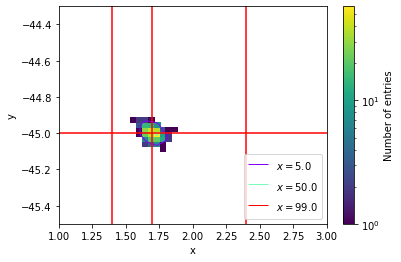

In [58]:
# Create and show a 2d histogram. Axis names are optional.
m2 = mh.Histdd(bins=45, range=[[1, 3], [-45.5, -44.3]], axis_names=['x', 'y'])
for i in [54, 55, 56]:
    m2.add(*get_posterior(results[i]['samples'], results[i]['weights']).T[:2])
# m2.add(*results[15]['samples'].T[:2])
# m2.add(*results[16]['samples'].T[:2])
# m2.add(*results[17]['samples'].T[:2])
counts = m2.histogram
xbins, ybins = m2.bin_centers()
cont = plt.contour(counts.transpose(),
            extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, cmap = plt.cm.rainbow, levels = [5, 50, 99])

artists, labels = cont.legend_elements()
plt.legend(artists, labels, handleheight=2, loc = "lower right")

plt.axvline(np.log10(25), c = 'r')
plt.axvline(np.log10(50), c = 'r')
plt.axvline(np.log10(250), c = 'r')
plt.axhline(-45, c = 'r')
# m2.add(np.random.normal(-2, 1, 10**6), np.random.normal(2, 1, 10**6))
m2.plot(log_scale = True)

plt.show()